## Problem 1(a):

### Pleiades:

In order to investigate the color magnitude-diagram (cmd) of the Pleiades, we query a search centered on the Pleiades with the Gaia DR2 catalogue. The Pleiades which are catagorized as open-clusters, are thought to be loosely gravitationally bound. Nontheless, we expect that their motions clump together to form their own distribution -- and hence the proper motions ( $\mu_{a}$, $\mu_{\delta}$) can probe as tracers for seperating them from the foreground and background stars. 


In figure (1-1) , we show the proper motions of the queried region around the Pleiades. Most characteristically, we notice the main overdensities in velocity space. The main distribution centered on approximately $\approx 0$ which are identified as foreground and background stars in our queried region. A second density appreas on the bottom right of the propermotion parameter space which is the __pleiades cluster__.

Here are the following constraints we add to the proper motion and parallax: 
 - 18 mas/yr < $\mu_{a}$ < 22 mas/yr
 - -58 mas/yr < $\mu_{\delta}$ < -39 mas/yr
 - 5.5 < $\omega$ < 8

Afte we apply the above contraints, we compare the cmd with and without the parameter constrains. Seen in figure 2(a), the red scatter represents the selected stars with the above constraints. 

### NGC 188:

Again, we repeat the same process stated above and plot the proper motions in the NGC 188 field. In figure 1.2, we can similarly see the foreground/background stars with a mean scatter centered around 0, while the NGC cluster is located in the 3rd quadrant. 


Parameters constraints for __NGC 188__ in proper motion and parallax: 
 - -2.9 mas/yr < $\mu_{a}$ < -1.1 mas/yr
 - -2.5 mas/yr < $\mu_{\delta}$ < 0 mas/yr
 - 0 < $\omega$ < 0.6
 
 
Finally, we create a CMD of NGC 188 with the above constraints, as seen in figure 2(b). The red scatter once again indicates the stars with the given contraint given above. 

### Discussion: 

Seen from the CMD figures 2(a) and 2(b), restricting the proper motion and parallax values we can quickly identifiy members which belond to the open clusters. When comparing 2(a) and 2(b), we can identify that the two clusters vary in shape significantly. The __Pleiades__ (2a), seems to have primarily a main-sequence population -- which might make senese, since they're young star clusters -- and thus making them an young stellar population. 

On the other hand, __NGC 188__ (2b) evidently seems to have both a main-sequence and red-giant branch part and perhaps a turn-off point. Such features indicate that the stellar population has had more time for its stars to go through their main-sequence phase and make it to the giant-branch, thus making it an older cluster.



We note that while the proper motion and parallax cuts may be able to quickly seperate the foregound/background stars from the cluster, these constraints don't return a completely clean sample, seen in 2(a) and 2(b), we notice that some indetified stars dont seem to be part of the cluster -- that are primarily from the inconsistency of the contraints we add. We expect that we would be able to select a better sample by fitting isochrones to the data and identify members with stellar isochrones.





# Problem 1(b)

To probe the actions of the selected clusters we cross-match our selected stars with the Sanders et al. data-set and explore their parameters in action space. 



Seen in figure 3(a) and 3(b), the only action-action plots that seemed to show significant correlation was ($J_{r}$, $J_{z}$). For the Pleiades (3a) we see that the cluster is actually clumped at the bottom of the figure, suggesting a correlation between the members in the cluster and how they orbit the galaxy. We note that for NGC 188 however that the Sanders et al. sample (3b) does not fully cover the region, resulting in a poor sample of stars around the cluster of NGC 188 -- however, we would expect that there would exist a similar feature seen like for the pleiades. 


## Source Code

In [1]:
import matplotlib.pyplot as plt
from astropy.io import ascii
% matplotlib inline
import numpy as np
import matplotlib.gridspec as gridspec
from astropy.table import Table


In [2]:
pl = ascii.read('pleiades') 
ngc = ascii.read('ngc')
pl_gmag = pl['phot_g_mean_mag']
pl_pmra, pl_pmdec = pl['pmra'], pl['pmdec']
pl_bprp = pl['phot_bp_mean_mag'] - pl['phot_rp_mean_mag']
pl_ra, pl_dec = pl['_RAJ2000'], pl['_DEJ2000']


ngc_gmag = ngc['phot_g_mean_mag']
ngc_pmra, ngc_pmdec = ngc['pmra'], ngc['pmdec']
ngc_bprp = ngc['phot_bp_mean_mag'] - ngc['phot_rp_mean_mag']
ngc_ra, ngc_dec = ngc['_RAJ2000'], ngc['_DEJ2000']

# Figure 1.1

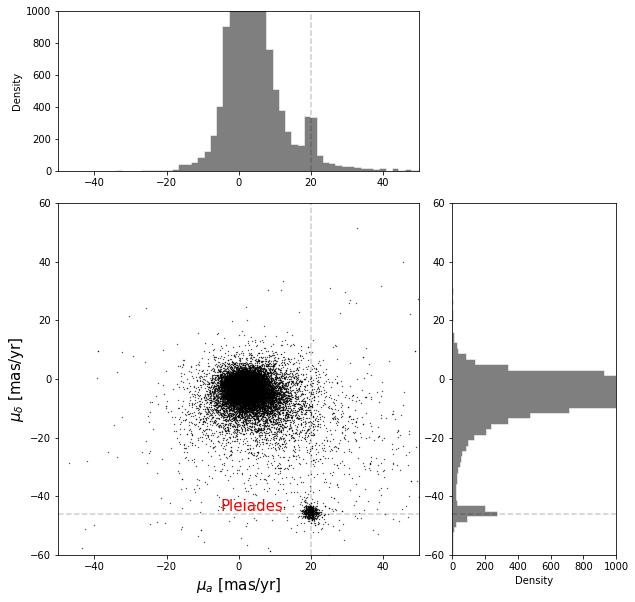

In [303]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

ax_main.scatter(pl_pmra, pl_pmdec,marker='o', s=0.1, color='k')
ax_main.axhline(-46, color='k', ls='--', alpha=0.2)
ax_main.axvline(20, color='k', ls='--', alpha=0.2)

ax_main.set_xlabel('$\mu_{a}$ [mas/yr]', fontsize=15)
ax_main.set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=15)
ax_main.text(-5, -45, 'Pleiades', fontsize=15, color='red')


ax_xDist.hist(pl_pmra,bins=120,align='mid', color='k', alpha=0.5, histtype='stepfilled', 
             edgecolor='white')
ax_xDist.set(ylabel='Density')
ax_xDist.set_xlim(-50,50)
ax_xDist.set_ylim(0,1000)
ax_xDist.axvline(20, color='k', ls='--', alpha=0.2)


ax_yDist.hist(pl_pmdec,bins=80,orientation='horizontal',align='mid', color='k', alpha=0.5, histtype='stepfilled', 
             edgecolor='white')
ax_yDist.set(xlabel='Density')
ax_yDist.set_xlim(0,1000)
ax_yDist.set_ylim(-60,60)
ax_yDist.axhline(-46, color='k', ls='--', alpha=0.2)

#plt.savefig('mot_pl.png', type='png')

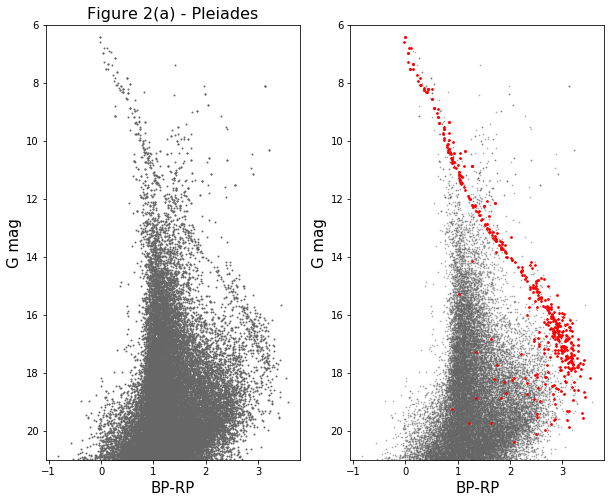

In [302]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
ax[0].scatter(pl_bprp, pl_gmag, s=.9, color='#666666')
ax[0].set_xlabel('BP-RP', fontsize=15)
ax[0].set_ylabel('G mag', fontsize=15)
ax[0].set_ylim(ax[0].set_ylim(6,21)[::-1])
ax[0].set_title('Figure 2(a) - Pleiades', size=16)


# Select based on pmra, pmdec and parallax
ple = np.where((pl_pmra>18) & (pl_pmra<22) & (pl_pmdec>-58) & (pl_pmdec<-39) & (pl['parallax'] > 5.5) & (pl['parallax'] < 8))

ax[1].scatter(pl_bprp, pl_gmag, s=.4, color='#666666', alpha=0.5)
ax[1].scatter(pl_bprp[ple], pl_gmag[ple], s=3, color='red', marker='o')


ax[1].set_xlabel('BP-RP', fontsize=15)
ax[1].set_ylabel('G mag', fontsize=15)
ax[1].set_ylim(ax[1].set_ylim(6,21)[::-1])

#plt.savefig('cmd_ple.png', type='png')


# Figure 1.2

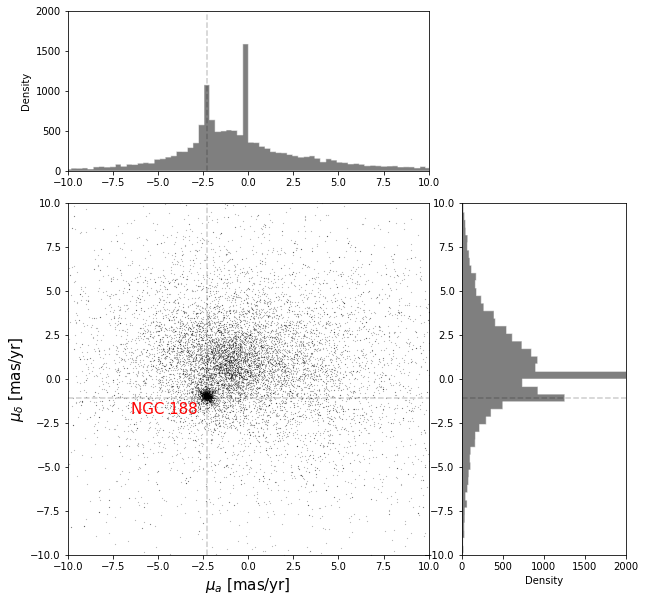

In [304]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

ax_main.scatter(ngc_pmra, ngc_pmdec,marker='o', s=0.01, color='k')
ax_main.axhline(-1.1, color='k', ls='--', alpha=0.2)
ax_main.axvline(-2.3, color='k', ls='--', alpha=0.2)

ax_main.set_xlabel('$\mu_{a}$ [mas/yr]', fontsize=15)
ax_main.set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=15)
ax_main.text(-6.5, -2, 'NGC 188', fontsize=15, color='red')


ax_xDist.hist(ngc_pmra,bins=500,align='mid', color='k', alpha=0.5, histtype='stepfilled', 
             edgecolor='white')
ax_xDist.set(ylabel='Density')
ax_xDist.set_xlim(-10,10)
ax_xDist.set_ylim(0,2000)
ax_xDist.axvline(-2.3, color='k', ls='--', alpha=0.2)


ax_yDist.hist(ngc_pmdec,bins=300,orientation='horizontal',align='mid', color='k', alpha=0.5, histtype='stepfilled', 
             edgecolor='white')
ax_yDist.set(xlabel='Density')
ax_yDist.set_xlim(0,2000)
ax_yDist.set_ylim(-10,10)
ax_yDist.axhline(-1.1, color='k', ls='--', alpha=0.2)

#plt.savefig('mot_ngc.png', type='png')

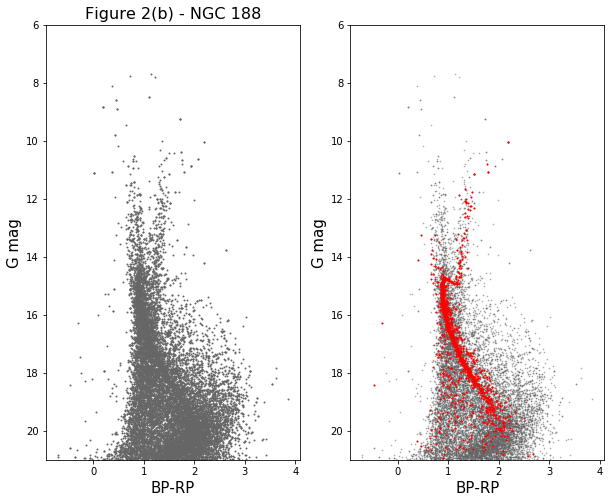

In [305]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
ax[0].scatter(ngc_bprp, ngc_gmag, s=.9, color='#666666')
ax[0].set_xlabel('BP-RP', fontsize=15)
ax[0].set_ylabel('G mag', fontsize=15)
ax[0].set_ylim(ax[0].set_ylim(6,21)[::-1])
ax[0].set_title('Figure 2(b) - NGC 188', size=16)


# Select based on pmra, pmdec and parallax
ples = np.where((ngc_pmra>-2.9) & (ngc_pmra<-1.1) & (ngc_pmdec>-2.5) & (ngc_pmdec<0) & (ngc['parallax'] > 0) & (ngc['parallax'] < 0.6))

ax[1].scatter(ngc_bprp, ngc_gmag, s=.4, color='#666666', alpha=0.5)
ax[1].scatter(ngc_bprp[ples], ngc_gmag[ples], s=1, color='red', marker='o')


ax[1].set_xlabel('BP-RP', fontsize=15)
ax[1].set_ylabel('G mag', fontsize=15)
ax[1].set_ylim(ax[1].set_ylim(6,21)[::-1])

#plt.savefig('cmd_ngc.png', type='png')


In [1]:
import h5py

/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
df = h5py.File("/Users/iraf1/Downloads/gaia_spectro.hdf5", "r+")
id_sanders = list(df['data']['source_id'])
jz = np.array(list(df['data']['Jz']))
jr = np.array(list(df['data']['JR']))
lz = np.array(list(df['data']['Lz']))
l, b = np.array(list(df['data']['l'])), np.array(list(df['data']['b']))
ra, dec = np.array(list(df['data']['ra'])), np.array(list(df['data']['dec']))

In [25]:
s_pl = np.where((ra>(np.min(pl_ra))) & (ra<np.max(pl_ra)) & (dec>np.min(pl_dec)) & (dec<np.max(pl_dec)))
s_ngc = np.where((ra>(np.min(ngc_ra))) & (ra<np.max(ngc_ra)) & (dec>np.min(ngc_dec)) & (dec<np.max(ngc_dec)))

Text(0.5,1,' 3(a) Pleiades')

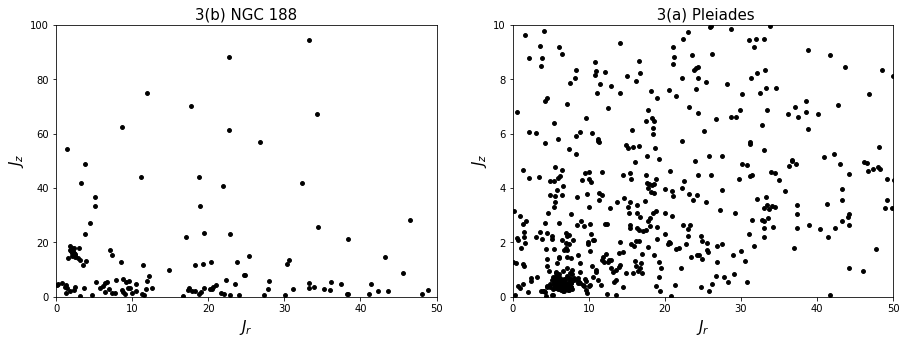

In [37]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].scatter(jr[s_ngc], jz[s_ngc], s=15, color='k')
ax[0].set_xlim(0,50)
ax[0].set_ylim(0,100)
ax[0].set_xlabel('$J_{r}$', size=15)
ax[0].set_ylabel('$J_{z}$', size=15)
ax[0].set_title('3(b) NGC 188', size=15)

ax[1].scatter(jr[s_pl], jz[s_pl], s=15, color='k')
ax[1].set_xlim(0,50)
ax[1].set_ylim(0,10)
ax[1].set_xlabel('$J_{r}$', size=15)
ax[1].set_ylabel('$J_{z}$', size=15)
ax[1].set_title(' 3(a) Pleiades', size=15)


# Problem 2(a)

In [2]:
from astropy.io import fits
img = fits.open("/Users/iraf1/Downloads/apStar-r8-2M03343803+7133452.fits")

# Define variables
flux_img = img[1].data # flux grid 
flux_img_err = img[2].data # flux_err grid 

# starting log(lamda)
img_start_lamda = img[1].header['CRVAL1'] # log lamda
img_delta_lamda = img[1].header['CDELT1'] # dispersion log lamda

flux = flux_img[3]
flux_err = flux_img_err[3]

flux_norm = (flux-np.min(flux))/(np.max(flux)-np.min(flux))
flux_err_norm = (flux_err-np.min(flux_err))/(np.max(flux_err)-np.min(flux_err))


lamda_start = (img_start_lamda)
lamda_delta = (img_delta_lamda)
N_dat = len(flux_img[0])
lamda_end = lamda_start + (N_dat*lamda_delta) # find ending value 
log_lamda = np.arange(lamda_start, lamda_end, lamda_delta)
lamda = 10**(log_lamda) # wavelength grid ---

Text(0,0.5,'Flux')

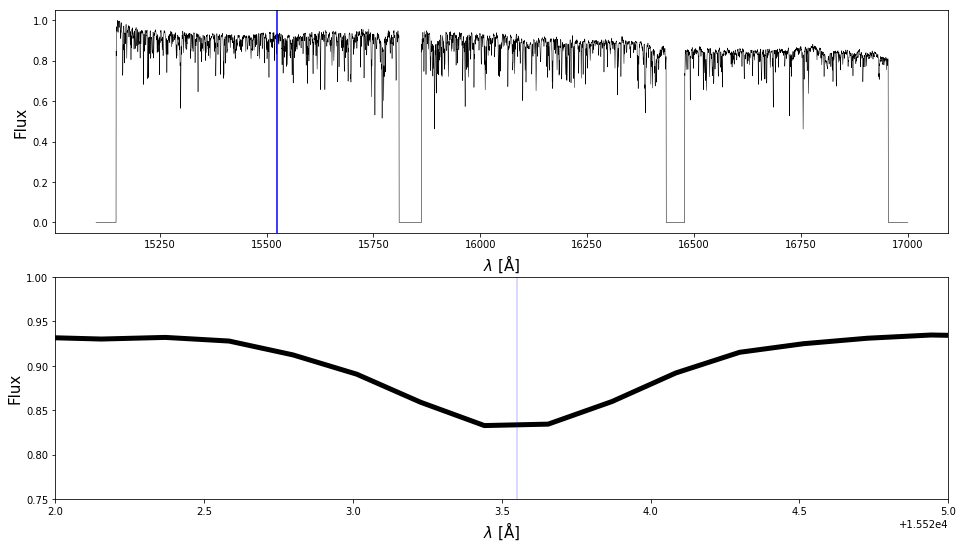

In [5]:
_, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,9))

ax[0].plot(lamda, flux_norm, color='k', lw=0.5)
ax[0].axvline(15523.45, color='blue')
ax[0].set_xlabel('$\lambda$ [Å]', size=15)
ax[0].set_ylabel('Flux', size=15)

ax[1].plot(lamda, flux_norm, color='k', lw=5)
ax[1].set_xlim(2+1.552e4, 15525)
ax[1].axvline(15523.55, color='blue', alpha=0.2)

ax[1].set_ylim(0.75,1)
ax[1].set_xlabel('$\lambda$ [Å]', size=15)
ax[1].set_ylabel('Flux', size=15)


In [42]:
# Select region with lamda where we want to fit a gaussian: 
ft = np.where((lamda>2+1.552e4) & (lamda<15525)) # region where we want to fit

# Define trimmed variables
lam_ft = lamda[ft]
flux_ft = flux_norm[ft]
flux_err_ft = flux_err_norm[ft]

def gaussian(x, mu, sigma, f):
    """Gaussian Curve""" 
    pp = np.sqrt(2*np.pi)
    p1 = (1/sigma*pp)
    ex = -0.5*(x-mu)**2/(sigma**2)
    G = p1*np.exp(ex)
    return (f-G)

def chi2(y_data, y_model):
    """Returns the chi2 estimation"""
    res = (y_data - y_model)**2
    return (np.sum(res))


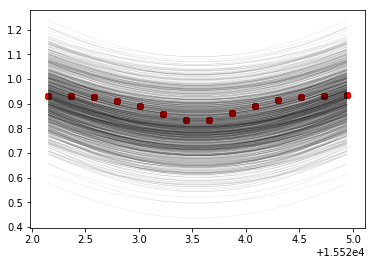

In [52]:
ch2 = []
A, B, C = [], [], []

# sample A, B, C from a gaussian and estimate ch2
for i in range (0, 1000):
    A_guess = 15523.55
    B_guess = np.random.normal(2.6, 0.1)
    C_guess = np.random.normal(1.76512689, 0.1)
    
    model = gaussian(lam_ft,A_guess,B_guess, C_guess)
    plt.plot(lam_ft, model, color='k', alpha=0.1, lw=0.5)
    
    ch2.append(chi2(flux_ft, model))
    A.append(A_guess)
    B.append(B_guess)
    C.append(C_guess)
    plt.scatter(lam_ft, flux_ft, color='red')

chi_2_minimumum: [0.00517315]


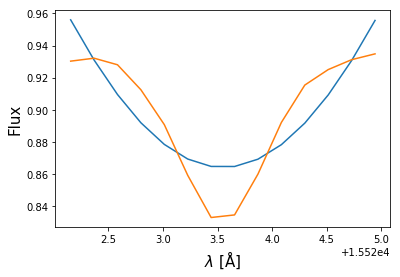

In [66]:
ch2 = np.array(ch2)
best_fit = np.where(ch2==np.min(ch2)) # best_fit value -- min(chi2)
A = np.array(A)
B = np.array(B)
C = np.array(C)


plt.plot(lam_ft, gaussian(lam_ft, A[Da], B[Da], C[Da])-0.001)
plt.plot(lam_ft, flux_ft)
plt.xlabel('$\lambda$ [Å]', size=15)
plt.ylabel('Flux', size=15)

print ("chi_2_minimumum: %s"%ch2[best_fit[0]])

# Problem (2b) - NOTE: This problem is still in progress

In [315]:
fin = np.loadtxt('output.txt', dtype='str')  # 



array(['aspcapStar-r8-l31c.2-2M00283971+8530377.fits',
       'aspcapStar-r8-l31c.2-2M00320079+8511465.fits',
       'aspcapStar-r8-l31c.2-2M00454489+8504180.fits',
       'aspcapStar-r8-l31c.2-2M00463920+8523336.fits',
       'aspcapStar-r8-l31c.2-2M00533497+8511145.fits',
       'aspcapStar-r8-l31c.2-2M03420383+2442454.fits',
       'aspcapStar-r8-l31c.2-2M03424189+2411583.fits',
       'aspcapStar-r8-l31c.2-2M03432662+2459395.fits',
       'aspcapStar-r8-l31c.2-2M03433692+2423382.fits',
       'aspcapStar-r8-l31c.2-2M03434796+2503115.fits',
       'aspcapStar-r8-l31c.2-2M03435569+2425350.fits',
       'aspcapStar-r8-l31c.2-2M03440509+2529017.fits',
       'aspcapStar-r8-l31c.2-2M03452219+2328182.fits',
       'aspcapStar-r8-l31c.2-2M03452349+2451029.fits',
       'aspcapStar-r8-l31c.2-2M03454407+2404268.fits',
       'aspcapStar-r8-l31c.2-2M03460381+2527108.fits',
       'aspcapStar-r8-l31c.2-2M03460649+2434027.fits',
       'aspcapStar-r8-l31c.2-2M03460750+2422278.fits',
       'as

In [270]:
# load all-star data 
all_star = fits.open("/Users/iraf1/Downloads/allStar-l31c.2.fits")

# define all_star variables
# all_star file 
all_star_teff = all_star[1].data['TEFF']

all_star_teff_err = all_star[1].data['TEFF_ERR']

all_star_logg = all_star[1].data['LOGG']
all_star_logg_err = all_star[1].data['LOGG_ERR']
all_star_feh = all_star[1].data['FE_H']
all_star_RA = all_star[1].data['RA']

# clean data
outliers = np.where((all_star_teff!=-9999999.0)) #& (all_star_logg!=-9999.0) & (all_star_feh!=-9999.0))

ra = all_star_RA[outliers]
teff = all_star_teff[outliers]
teff_err = all_star_teff_err[outliers]
logg = all_star_logg[outliers]
logg_err = all_star_logg_err[outliers]
feh = all_star_feh[outliers]

IndexError: index 0 is out of bounds for axis 0 with size 0

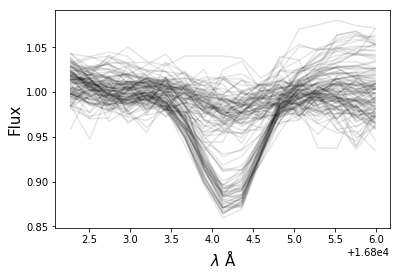

In [321]:
# read spectra file 
spectra = np.loadtxt("output.txt", dtype='str')

med_f, temp, temp_err, feH, lg, lg_err = [], [], [], [], [], []

for i in spectra:
    ls_spectra = fits.open("APOGEE_spectra/%s"%i)
    F =  (ls_spectra[1].data) # flux of pixel 
    
    # aborption feature 
    abs_line = 16804.2
    
    # +/- 2 centered on absorption feature 
    f = np.where((lamda>abs_line-2) & (lamda<abs_line+2))
    flux = F[f] # redefine variables
    L = lamda[f] # redefine variables
    med_flux = np.median(flux) # will give us roughly the valley of the absorption feature 
    
    # find id of fits file 
    fits_ra = ls_spectra[0].header['RA']
    
    # cross-match with all_star ra
    finder = np.where(ra==fits_ra)
    inx_finder = (finder[0][0])

    
    med_f.append(med_flux)
    temp.append(teff[inx_finder])
    temp_err.append(teff_err[inx_finder])
    feH.append(feh[inx_finder])
    lg.append(logg[inx_finder])
    lg_err.append(logg_err[inx_finder])
    
    plt.plot(L, flux, alpha=0.1, color='k')
    plt.xlabel("$\lambda$ Å", size=15)
    plt.ylabel('Flux', size=15)
    plt.savefig('me.pdf', type='pdf', bbox_inches='tight')

In [272]:
# Make lists into numpy arrays and clean data
med_f = np.array(med_f)
temp = np.array(temp)
temp_err = np.array(temp_err)
feH = np.array(feH)
lg = np.array(lg)
lg_err = np.array(lg_err)
 
rmv = np.where((temp!=-9999.) & (feH!=-9999.) & (lg!=-9999.))


# Define final data
final_data = Table([med_f[rmv], temp[rmv], temp_err[rmv], feH[rmv], lg[rmv], lg_err[rmv]], 
                  names=('flux', 'temp', 'temp_err', 'feH', 'logg', 'logg_err'))

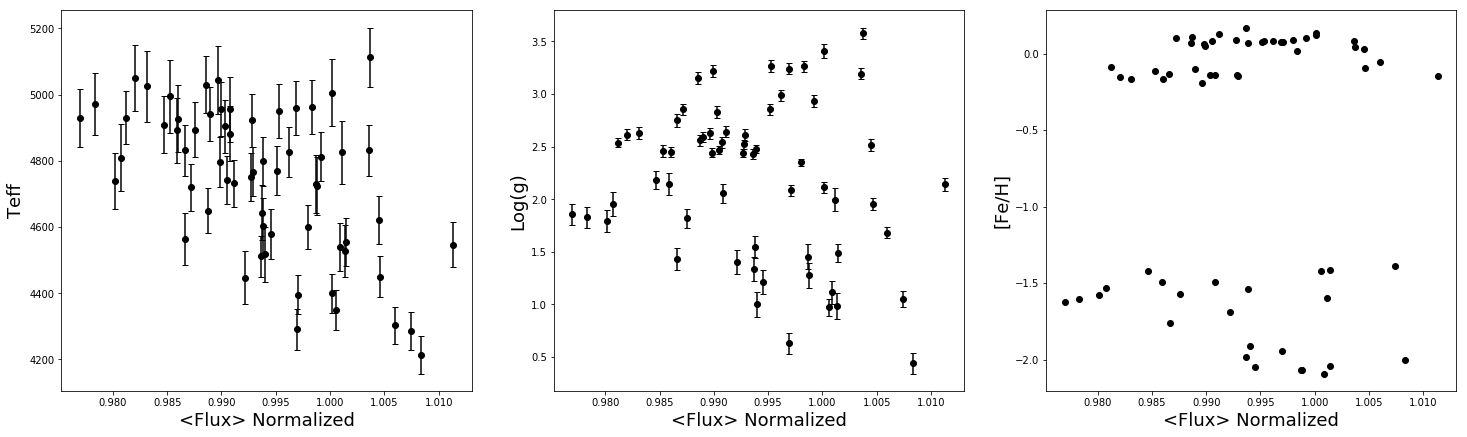

In [308]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

ax[0].errorbar(final_data['flux'], final_data['temp'], yerr=final_data['temp_err'], fmt='o', capsize=3, color='k')
ax[0].set_xlabel('<Flux> Normalized', size=18)
ax[0].set_ylabel('Teff', size=18)

ax[1].errorbar(final_data['flux'], final_data['logg'], yerr=final_data['logg_err'], fmt='o', capsize=3, color='k')
ax[1].set_ylabel('Log(g)', size=18)
ax[1].set_xlabel('<Flux> Normalized', size=18)

ax[2].errorbar(final_data['flux'], final_data['feH'], fmt='o', capsize=3, color='k')
ax[2].set_xlabel('<Flux> Normalized', size=18)
ax[2].set_ylabel('[Fe/H]', size=18)

plt.savefig('abs1.pdf', type='pdf')




In [274]:
# read spectra file 
spectra = np.loadtxt("output.txt", dtype='str')

med_f2, temp2, temp_err2, feH2, lg2, lg_err2 = [], [], [], [], [], []

for i in spectra:
    ls_spectra = fits.open("APOGEE_spectra/%s"%i)
    F =  (ls_spectra[1].data) # flux of pixel 
    
    # aborption feature 
    abs_line = 15339.2
    
    # +/- 2 centered on absorption feature 
    f = np.where((lamda>abs_line-2) & (lamda<abs_line+2))
    flux = F[f] # redefine variables
    L = lamda[f] # redefine variables
    med_flux = np.median(flux) # will give us roughly the valley of the absorption feature 
    
    # find id of fits file 
    fits_ra = ls_spectra[0].header['RA']
    
    # cross-match with all_star ra
    finder = np.where(ra==fits_ra)
    inx_finder = (finder[0][0])

    
    med_f2.append(med_flux)
    temp2.append(teff[inx_finder])
    temp_err2.append(teff_err[inx_finder])
    feH2.append(feh[inx_finder])
    lg2.append(logg[inx_finder])
    lg_err2.append(logg_err[inx_finder])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [275]:
# Make lists into numpy arrays and clean data
med_f2 = np.array(med_f2)
temp2 = np.array(temp2)
temp_err2 = np.array(temp_err2)
feH2 = np.array(feH2)
lg2 = np.array(lg2)
lg_err2 = np.array(lg_err2)
 
rmv2 = np.where((temp2!=-9999.) & (feH2!=-9999.) & (lg2!=-9999.))


# Define final data
final_data2 = Table([med_f2[rmv2], temp2[rmv2], temp_err2[rmv2], feH2[rmv2], lg2[rmv2], lg_err2[rmv2]], 
                  names=('flux', 'temp', 'temp_err', 'feH', 'logg', 'logg_err'))

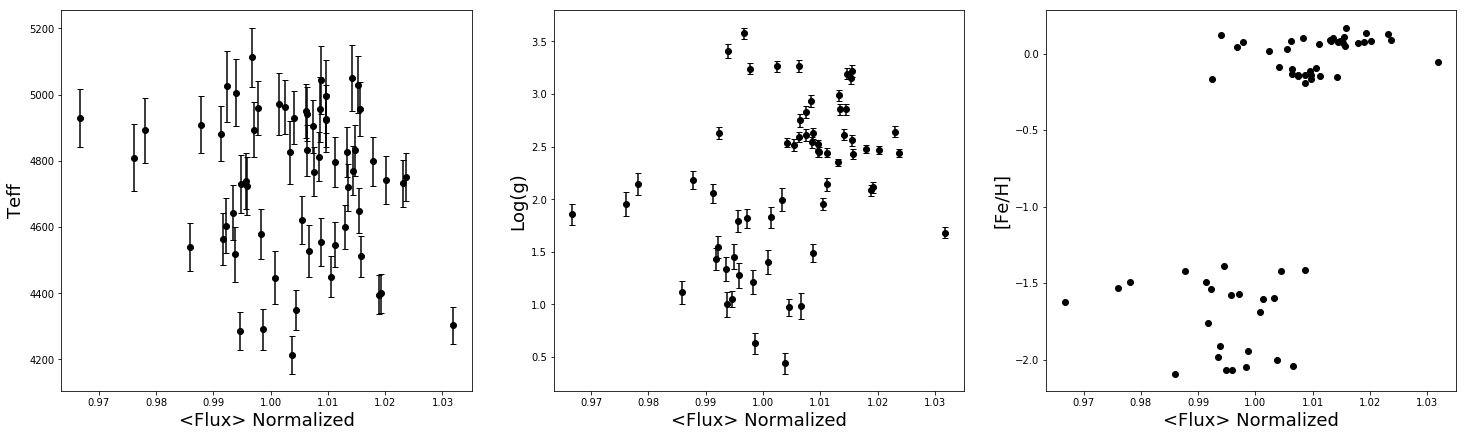

In [309]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

ax[0].errorbar(final_data2['flux'], final_data2['temp'], yerr=final_data2['temp_err'], fmt='o', capsize=3, color='k')
ax[0].set_xlabel('<Flux> Normalized', size=18)
ax[0].set_ylabel('Teff', size=18)

ax[1].errorbar(final_data2['flux'], final_data2['logg'], yerr=final_data2['logg_err'], fmt='o', capsize=3, color='k')
ax[1].set_ylabel('Log(g)', size=18)
ax[1].set_xlabel('<Flux> Normalized', size=18)

ax[2].errorbar(final_data2['flux'], final_data2['feH'], fmt='o', capsize=3, color='k')
ax[2].set_xlabel('<Flux> Normalized', size=18)
ax[2].set_ylabel('[Fe/H]', size=18)

plt.savefig('abs2.pdf', type='pdf')

In [304]:
# read spectra file 
spectra = np.loadtxt("output.txt", dtype='str')

med_f3, temp3, temp_err3, feH3, lg3, lg_err3 = [], [], [], [], [], []

for i in spectra:
    ls_spectra = fits.open("APOGEE_spectra/%s"%i)
    F =  (ls_spectra[1].data) # flux of pixel 
    
    # aborption feature 
    abs_line = 15492
    
    # +/- 2 centered on absorption feature 
    f = np.where((lamda>abs_line-1) & (lamda<abs_line+1))
    flux = F[f] # redefine variables
    L = lamda[f] # redefine variables
    med_flux = np.median(flux) # will give us roughly the valley of the absorption feature 
    
    # find id of fits file 
    fits_ra = ls_spectra[0].header['RA']
    
    # cross-match with all_star ra
    finder = np.where(ra==fits_ra)
    inx_finder = (finder[0][0])

    
    med_f3.append(med_flux)
    temp3.append(teff[inx_finder])
    temp_err3.append(teff_err[inx_finder])
    feH3.append(feh[inx_finder])
    lg3.append(logg[inx_finder])
    lg_err3.append(logg_err[inx_finder])
    

IndexError: index 0 is out of bounds for axis 0 with size 0

In [305]:
# Make lists into numpy arrays and clean data
med_f3 = np.array(med_f3)
temp3 = np.array(temp3)
temp_err3 = np.array(temp_err3)
feH3 = np.array(feH3)
lg3 = np.array(lg3)
lg_err3 = np.array(lg_err3)
 
rmv3 = np.where((temp3!=-9999.) & (feH3!=-9999.) & (lg3!=-9999.))


# Define final data
final_data3 = Table([med_f3[rmv3], temp3[rmv3], temp_err3[rmv3], feH3[rmv3], lg3[rmv3], lg_err3[rmv3]], 
                  names=('flux', 'temp', 'temp_err', 'feH', 'logg', 'logg_err'))

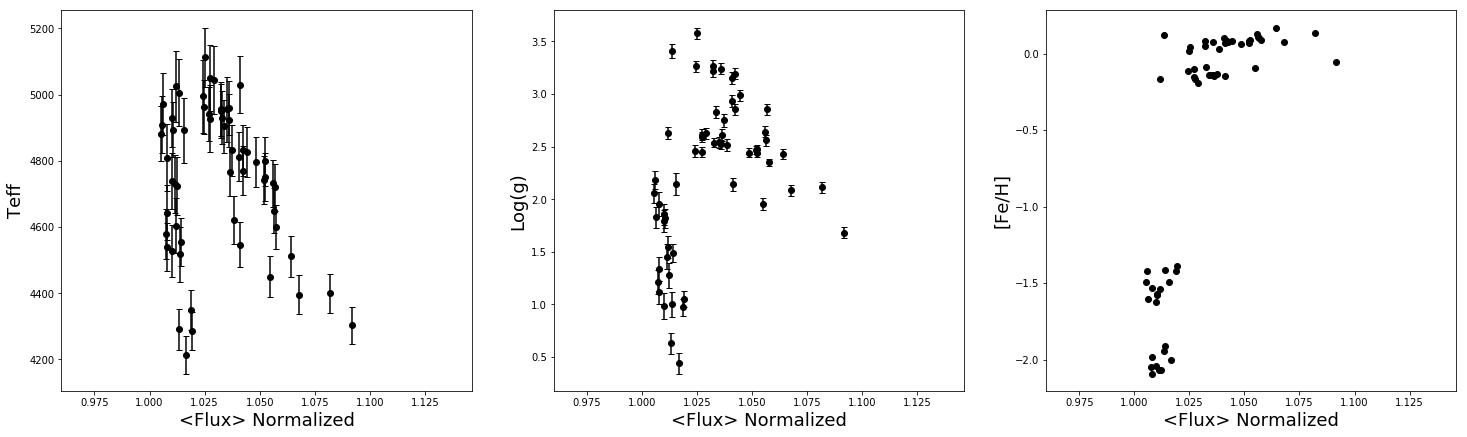

In [314]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

ax[0].errorbar(final_data3['flux'], final_data3['temp'], yerr=final_data3['temp_err'], fmt='o', capsize=3, color='k')
ax[0].set_xlabel('<Flux> Normalized', size=18)
ax[0].set_ylabel('Teff', size=18)
ax[0].set_xlim(0.96)

ax[1].errorbar(final_data3['flux'], final_data3['logg'], yerr=final_data3['logg_err'], fmt='o', capsize=3, color='k')
ax[1].set_ylabel('Log(g)', size=18)
ax[1].set_xlabel('<Flux> Normalized', size=18)
ax[1].set_xlim(0.96)

ax[2].errorbar(final_data3['flux'], final_data3['feH'], fmt='o', capsize=3, color='k')
ax[2].set_xlabel('<Flux> Normalized', size=18)
ax[2].set_ylabel('[Fe/H]', size=18)
ax[2].set_xlim(0.96)

plt.savefig('abs3.pdf', type='pdf')



(0.96, 1.14685167331295)

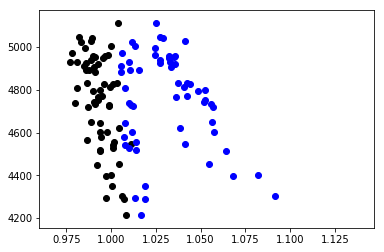

In [307]:
plt.scatter(final_data['flux'], final_data['temp'], color='k')
#plt.scatter(final_data2['flux'], final_data2['temp'], color='red')
plt.scatter(final_data3['flux'], final_data3['temp'], color='blue')
plt.xlim(0.96)


### Solutions for problem 3 and 5 

[Problem 3 (a-b)](https://github.com/AndyTza/modern_astro/blob/master/hw3_theory/im1.jpg)


[Problem 3 (c)](https://github.com/AndyTza/modern_astro/blob/master/hw3_theory/im2.jpg)

[Problem 5 (a)](https://github.com/AndyTza/modern_astro/blob/master/hw3_theory/im3.jpg)


[Problem 5 (b-c)](https://github.com/AndyTza/modern_astro/blob/master/hw3_theory/im4.jpg)

[Problem 5 (d-e)](https://github.com/AndyTza/modern_astro/blob/master/hw3_theory/im5.jpg)


[Problem 5 (f)](https://github.com/AndyTza/modern_astro/blob/master/hw3_theory/im6.jpg)
